## Lab 6 (February 14):
### Tibbles and Data Importation

Course page: https://ambujtewari.github.io/stats306-winter2022/

Lab page: https://bosafoagyare.netlify.app/courses/stats306-w22/
 <br> <br>

  Today, we are going to look at:   
 - [Tibbles]()
 - [Data Importation]()

 






<br><br>
> ## Let's start by loading our packages. It is always encouraged to load all packages atop your codes.

In [56]:
install.packages("gapminder")                      ## Use the install.packages("<PACKAGE NAME>") command to install packages in R
library(gapminder)                                 ## To load a package (already installed) use the library(<PACKAGE NAME>) command
library(tidyverse)
library(bench)       
options(repr.plot.width=10, repr.plot.height=8)    ## Set the dimension of all plots 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



---

<br> <br>


**Introduction:**   

As data scientists, we need data for our analyses. Data could be created on the fly or imported from a file either locally or remotely. We will look at how to create data on the fly (using Tibbles) as well as importing them from files (Data Importation).   

<br>   
# 1. Tibbles
We can create our own data using `tibble()` or `data.frame()`. These two produce similar but  slightly different objects whose difference would be explored later. Popular functions for tibbles include:
- `tibble()` - Use to contrct data by **columns**.
- `tribble()` - Use to contrct data by **rows**.
- `as_tibble()` - used to convert a dataset into a tibble.
- `is_tibble()` - a logical function to test whether a dataset is a tibble.





## **(1) Creating datasets**

## Example 1.1

In [39]:
## (1) Using tibble()
tdf <- tibble(
  name   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  age    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  class  = c('dog', 'cat', 'cat', 'dog')
)


## (2) Using tribble() 
## enters data by row. 
tr_df <- tribble(
  ~name, ~age, ~weight, ~class,
  # -----|-----|------ |-----    just to signify that this is a the header (column names)                   
  "Nikita", 10, 24, "dog",
  "Simons", 7, 16, "cat",
  "Pockets", 5, 12, "cat",
  "Eres", 6, 18, "dog"
)


## (3) Using data.frame()
df <- data.frame(
  name   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  age    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  class  = c('dog', 'cat', 'cat', 'dog')
)

In [ ]:
## inspect the data
tdf
tr_df
df 


## **(2) Differences between Tibble and Dataframe**
Tibbles are different than dataframes in that:

## Example 1.2

#### **(i) Tibbles <u>**print**</u> data with its column types (i.e interger, character etc)**

In [ ]:
## print the tibble data
tdf %>% print()

## print the dataframe
df %>% print()


**(ii) Tibbles <u>**print**</u> only the first 10 rows and all columns that fit the screen. This default feature can be overriden with `options(tibble.print_max = n, tibble.print_min = m)`** 

In [ ]:
## tibble
tibble(x = 1:1000, y = sample(x = c("True", "False"), size = 1000, replace = TRUE)) %>% print()

In [33]:
## Overiding the defaults
options(tibble.print_min = 20)

In [ ]:
## dataframe
data.frame(x = 1:1000, y = sample(x = c("True", "False"), size = 1000, replace = TRUE)) %>% print()


**(iii) In <u>**subsetting**</u>, `[` always returns another tibble while dataframes sometimes return a data frame or vector**

In [ ]:
## (1) Subsetting just a column using [
tdf[, 2] # the tibble outputs another tibble
df[, 2]  # dataframe returns a vector

In [ ]:
## (2) Subsetting just a column using [[ or $

# this gives us vector in both cases
tdf[[2]]
df[[2]]

tdf$age
df$age

**(iv) In <u>**subsetting**</u>, dataframes allow for partial matching; tibbles do not!**

In [ ]:
tdf$a ## tibble
df$a  ## dataframe

**(v) They permit the use of invalid R variable names for column naming while dataframes do not!**

In [ ]:
tibble(
  `:`   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  `_`    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  `@`  = c('dog', 'cat', 'cat', 'dog')
)

In [ ]:
data.frame(
  `:`   = c('Nikita', 'Simons', 'Pockets', 'Eres'),    
  `_`    = c(10, 7, 5, 6),
  weight = c(24, 16, 12, 18),                          
  `@`  = c('dog', 'cat', 'cat', 'dog')
)

**(vi) Tibbles allow for creating multiple columns, some of which may depend on those being created at the same time; dataframes do not allow this!**

In [53]:
## tibble
(tbl_df <- tibble(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
))

In [ ]:
## dataframe
(df <- tibble(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
))

**(vii) Tibbles do not support arithmetic operations on columns. They silently get converted to dataframes**

In [ ]:
tbl_df <- tibble(
  x = 1:5,
  y = 5,
  z = x^3 + 5*y
)

tbl_df^2 ## that the output becomes dataframe

<br><br>
## 2. Data Importation
As discussed earlier, data typically comes in 5 types namely:
<br><br>

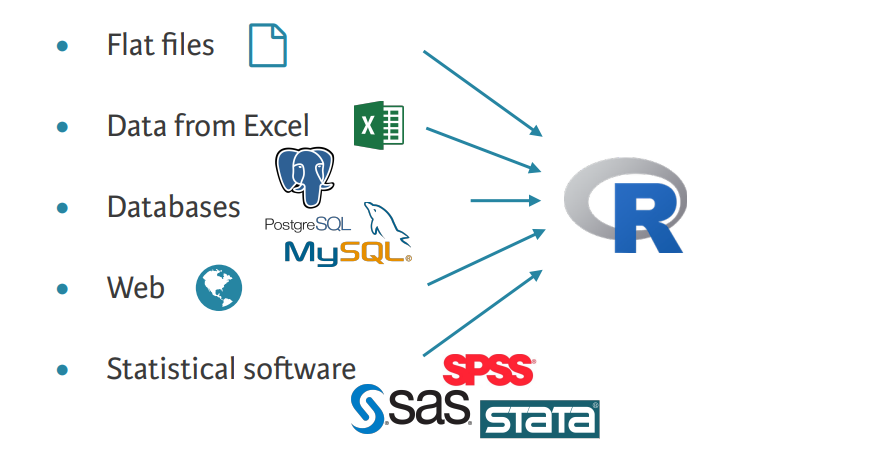

_[Source: Datacamp]_

Our job is to learn how to read and write data in some of these file formats as needed. Most of these file formats require special packages. Below are a few:

- **readr** - comma seperated values, tab seperated values and other delimiters (.csv, .txt)
- **readxl** - excel files (.xls and .xlsx)
- **haven** - SPSS, Stata, and SAS files
- **DBI** - databases
- **jsonlite** - JSON ((JavaScript Object Notation) 
- **xml2** - XML
- **httr** - Web APIs
- **rvest** - HTML (Web Scraping)

For the purpose of this lab, we will explore reading and writing delimiters (`readr`) and excel files (`readxl`) as they are arguably the most popular file formats for data.

<br>   
## 2.1 Flat Files
## **(1) Reading Delimiters**
We use the functions:
- `read_csv` - for comma separated values
- `read_tsv` - for tab separated values
- `read_delim` - for general delimiters (could be comma, semi-colon, tab, pipe or any delimiter).

General structure arguments for these functions include:   
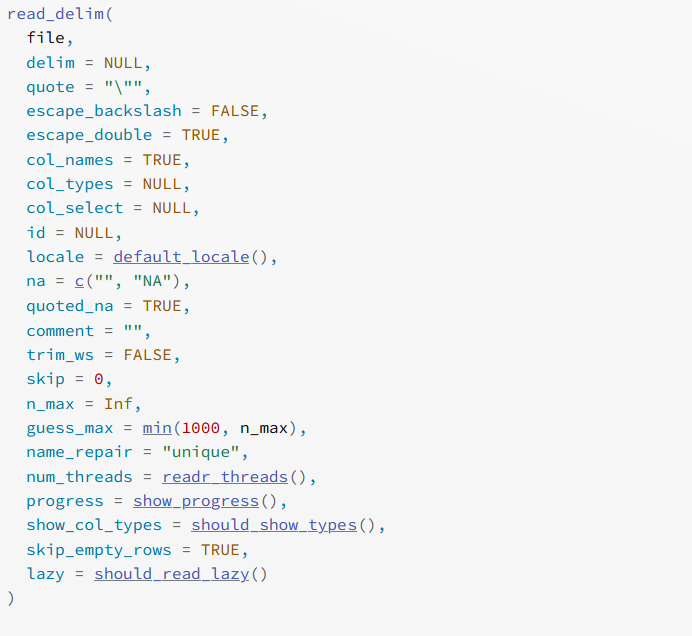

We will explore a few examples below

#### **(i) Reading csvs and txts**

In [ ]:
## (1) Reading CSV
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.csv"
chicks_df = read_csv(file = file_path) 
head(chicks_df)

In [ ]:
## (2) Reading Tab separated file
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path) 
head(chicks_df_tab)

**_Challenge:_** How would you read the `chicks2.txt` file found [here]("https://github.com/bosafoagyare/web-academic/tree/master/content/courses/stats306-W22/Lab-Notes/lab6_data")?

In [ ]:
## (3) Reading pipe separated file
## your code here

#### **(ii) Column names**






In [ ]:
## (4) Discarding column names in reading the data
## R automatically sets column names for the data
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path, col_names = FALSE) 
head(chicks_df_tab)

In [ ]:
## (6) Adding or renaming column names
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path,
                         col_names = c("weight in lb", "feed type"), 
                         show_col_types = FALSE) ## hides warning message
head(chicks_df_tab)

#### **(iii) Column tpes**
The column types include:    
- `c` = character

- `i` = integer

- `n` = number

- `d` = double

- `l` = logical

- `f` = factor

- `D` = date

- `T` = date time

- `t` = time

- `?` = guess

- `_ `or `-` = skip

In [ ]:
## (7) Change default column types to integer and factor respectively
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path, col_types = "if") ## i for inter, f for factor 
head(chicks_df_tab)

#### **(iv) Skip rows and select row limits**

In [ ]:
## (8) skip first 3 rows and set maximum imported rows to 4
file_path = "https://raw.githubusercontent.com/bosafoagyare/web-academic/master/content/courses/stats306-W22/Lab-Notes/lab6_data/chicks.txt"
chicks_df_tab = read_tsv(file = file_path,
                         col_names = c("weight in lb", "feed type"), 
                         skip = 3,
                         n_max = 4,
                         show_col_types = FALSE) ## hides warning message
chicks_df_tab

<br>   
## **(2) Writing Delimiters**
Much like reading delimited files, we can equally write to files (create files) in R using functions such as:

- `write_csv` - for comma separated values
- `write_tsv` - for tab separated values
- `write_delim` - for general delimiters (could be comma, semi-colon, tab, pipe or any delimiter).

**NB:** When writing to file on the file, we use `write_file`

The general structure includes:

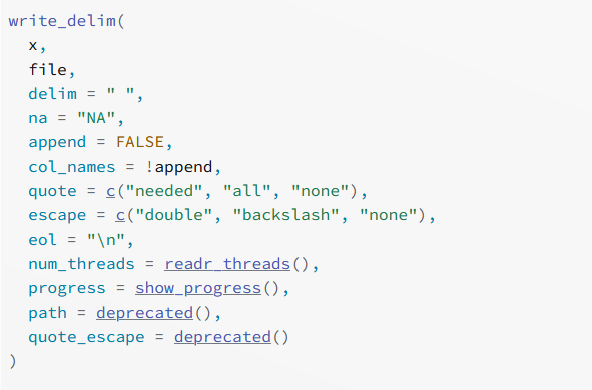

We will explore a few examples below:

#### **(i) Writing to delimiters on the fly**
**NB:** When writing to file on the file, we use `write_file`

In [ ]:
## (1) Writing to comma delimited
write_file(x = "a,b,c\n1,2,3\n4,5,NA", path = "file.csv") # we use \n to signify new line (next line)

## now let's take a look
read_csv(file = "file.csv")

In [ ]:
## (2) Writing to tab delimited
write_file(x = "a\tb\tc\n1\t2\t3\n4\t5\tNA", path = "file.tsv")

## now let's take a look
read_tsv(file = "file.tsv")


In [ ]:
## (3) Writing to pipe-delimited
write_file(x = "a|b|c\n1|2|3\n4|5|NA", path = "file.txt")

## now let's take a look
read_delim(file = "file.txt", delim = "|")

#### **(ii) Writing to delimiters from already exixting data**
Recall our pets data. We are going to save this to csv, tab and pipe-delimited

In [48]:
## Reacll the pets data
tdf

name,age,weight,class
<chr>,<dbl>,<dbl>,<chr>
Nikita,10,24,dog
Simons,7,16,cat
Pockets,5,12,cat
Eres,6,18,dog


In [50]:
## (1) Write to csv
write_csv(tdf, file = "pet1.csv")

In [51]:
## (2) Write to tab delimited
write_tsv(tdf, file = "pet2.tsv")

In [52]:
## (3) Write to pipe delimited
write_delim(tdf, file = "pet3.txt", delim = "|")

<br><br>
# 3. Challenge
Complete the following tasks:
## 3.1 Pets Data
- Import the `pets.txt` data from [here](https://github.com/bosafoagyare/web-academic/tree/master/content/courses/stats306-W22/Lab-Notes/lab6_data)
- How many rows for each class has no missing values for age?
- Create a tibble for the resulting data in task two and save this data to a "/" delimited file with name: `compete_pets_df`
- Make a bar chart with proportion for this new tibble.
- Which class has most pet counts?


In [ ]:
## your code here

## 3.2 NHANES Data
In your job as a data scientist, you would most likely ever download data from a website. We have learned that data can be stored in several formats. One popular language for data analysis, especially in health is SAS. In this challenge, we are going to learn to read a wave of the NHANES (National Health and Nutrition Examination Survey) from the CDC (Centre for Disease and Control) [website](https://www.cdc.gov/).

<br>    
**(a)**    

- First, install and load the `haven` package. (This may already come with Tidyverse). 
- Import the `Demographics Data` dataset for the year 2015 [here](https://wwwn.cdc.gov/Nchs/Nhanes/continuousnhanes/default.aspx?BeginYear=2015) (DEMO_I.XPT) using the [`read_xpt()`](https://haven.tidyverse.org/reference/read_xpt.html) function (Note that this is a SAS data storage extension). Feel free to read about the documentation of the variables (column names) to get a good idea of what the dataset is about. _[hint: [source here](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm)]_
- Create a tibble containing only  `RIAGENDR` - Gender, `RIDAGEYR` - Age in years at screening and `DMDEDUC3` - Education level - Children/Youth 6-19. 
- Construct a histogram and a density plot using appropriate binwidth for the `RIDAGEYR` (Age in years at screening) variable.    

🤔 **Question:** What type of distribution best explains the data.


**(b)**
- Convert the `RIAGENDR` Gender variable to factor _[hint: `as.factor()`]_. Note that this is coded as 1=male and 2=female.
- We wish to compare the distribution of age for each gender. What appropriate visuallization tool should be used to explore this problem? Which gender appears to be older based on your plot?
- Finally, use an appropriate visualization tool to explore the distribution of the `DMDEDUC3` - Education level variable. Please refer to https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC3 to inspect the coding for this variable. Based on your plot, which grade level has the highest frequency?

In [ ]:
## your code here